# Effects of the Borrowers Interest Rates on loans
## Presented by: Islam A. Emam

## Overview
In this analysis, I am going to study the Borrowers' interest rates and their effect with other aspects. Understand from this historical data how the rates changed and for what reason(s) are they trending.

## Dataset overview
[Prosper.com](https://www.prosper.com/) a well known investment company based in California, US has data about loan listings that are through their company's database. I provide [this link](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000) for the variables definition. This data set contins 113937 listings.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Set off the warning
pd.set_option('mode.chained_assignment', None)
np.warnings.filterwarnings('ignore')

# To see all columns in my dataset
pd.set_option('display.max_columns', 500)

In [2]:
# load in the dataset into a pandas dataframe, I will look at the structure in the wrangling process
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Filitering my variables of interest
df2 = df[['ListingKey', 'CreditGrade','ClosedDate','BorrowerAPR','BorrowerRate', 'EstimatedEffectiveYield'
          ,'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)','BorrowerState','EmploymentStatus'
          , 'EmploymentStatusDuration','IsBorrowerHomeowner', 'DebtToIncomeRatio','IncomeRange', 'StatedMonthlyIncome'
          , 'LoanOriginalAmount', 'LoanOriginationDate','PercentFunded', 'Investors']]

In [4]:
# Data Wrangling process
# Lowercase column names
df2.columns = map(str.lower, df2.columns)
# Merge the prosperrating (alpha) into the creitgrade
df2.creditgrade.fillna(df2['prosperrating (alpha)'], inplace=True)
# Handle remaining null as OFF
df2['creditgrade'] = df2.creditgrade.fillna('NC')
#Drop the prosperrating (alpha) column, we do not need it.
df2 = df2.drop(['prosperrating (alpha)'], axis = 1)
# Define rhe numbers as a string
df2['listingcategory (numeric)'] = df2['listingcategory (numeric)'].astype(str)
# use .replace and replace each variable
df2['listingcategory (numeric)'] = df2['listingcategory (numeric)'].replace({'0' : 'Not Available', '1' : 'Debt Consolidation', '2' : 'Home Improvement'
                                                                             , '3' : 'Business', '4' : 'Personal Loan', '5' : 'Student Use'
                                                                             , '6' : 'Auto', '7' : 'Other', '8' : 'Baby&Adoption'
                                                                             , '9' : 'Boat', '10' : 'Cosmetic Procedure', '11' : 'Engagement Ring'
                                                                             , '12' : 'Green Loans', '13' : 'Household Expenses', '14' : 'Large Purchases'
                                                                             , '15' : 'Medical/Dental', '16' : 'Motorcycle', '17' : 'RV'
                                                                             , '18' : 'Taxes', '19' : 'Vacation', '20' : 'Wedding Loans'})
# Rename the lisitng category column no spaces and parenthesis
df2.rename(columns = {"listingcategory (numeric)" : "listingcat"}, inplace = True)
df2.loanoriginationdate = pd.to_datetime(df2.loanoriginationdate)
# Fill borrowerapr nulls with the means
df2['borrowerapr'] = df2.borrowerapr.fillna(df2['borrowerapr'].mean())
# Make employmentstsatusduration years not months
df2['employmentstatusduration'] = df2['employmentstatusduration']/12
# astype categorial
df2.creditgrade = df2.creditgrade.astype('category')
df2.incomerange = df2.incomerange.astype('category')
df2.listingcat = df2.listingcat.astype('category')

## The Analysis

### Borrowers' profile
The first thing I want to do is understand my data, who are these borrowers and how are they distributed along the various information? Plotted are 3 main charts describing the borrowers.

Most borrowers have income ranges in the middle (25k-49.999k and 50k-74.999k USD) with the majority already employed/full timers. Slightly less than half are home owners. Finally, most borrowers have working experience ranging from 0-10 years of experience. With the heaviest Number of borrowers fall in the early years.

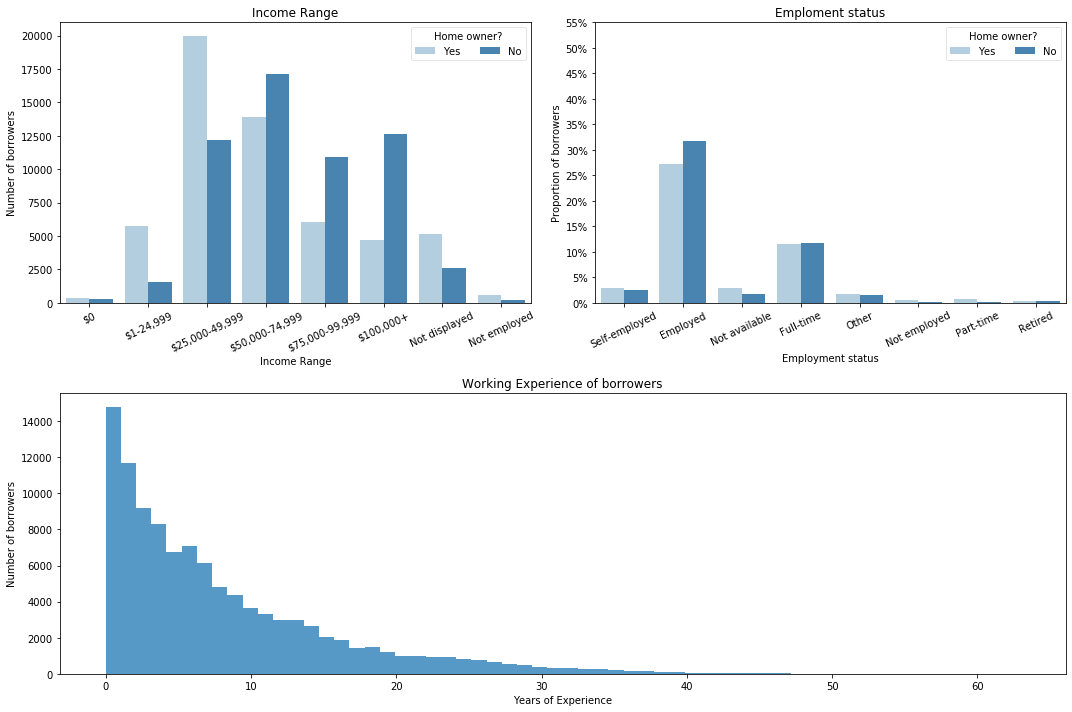

In [5]:
plt.figure(figsize = [15, 10])

# Income range spread
plt.subplot(2, 2, 1) # 1 row, 2 cols, subplot 1
order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed']
ax = sb.countplot(data = df2, x = 'incomerange', hue = 'isborrowerhomeowner', palette = 'Blues', order = order);
plt.xticks(rotation = 25);
plt.legend(['Yes', 'No'], loc = 1
          ,ncol = 2, framealpha = 0.5, title = 'Home owner?');
plt.xlabel('Income Range');
plt.ylabel('Number of borrowers');
plt.title('Income Range');

# Loan terms
plt.subplot(2, 2, 2) # 1 row, 2 cols, subplot 2
n_points = df2.shape[0]
max_count = df2['employmentstatus'].value_counts().max()
max_prop = max_count / n_points
order = df2['employmentstatus'].value_counts().index
# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.0%}'.format(v) for v in tick_props]
#Now plot
sb.countplot(data = df2, x= 'employmentstatus', hue = 'isborrowerhomeowner', palette = 'Blues');
plt.ylim([0,40000]);
plt.yticks(tick_props * n_points, tick_names);
plt.xticks(rotation = 25);
plt.legend(['Yes', 'No'], loc = 1
          ,ncol = 2, framealpha = 0.5, title = 'Home owner?');
plt.xlabel('Employment status');
plt.ylabel('Proportion of borrowers');
plt.title('Emploment status');

# Experience
plt.subplot(2, 1, 2) # 1 row, 2 cols, subplot 3
plt.hist(data = df2, x = 'employmentstatusduration', bins = 60, alpha = 0.75);
plt.xlabel('Years of Experience');
plt.ylabel('Number of borrowers');
plt.title('Working Experience of borrowers');

plt.tight_layout()

### Estimated Effective yield distribution
[Investors]((https://www.investopedia.com/terms/e/effectiveyield.asp)) putting money in Borrowers' loans. Frequent spikes all over the distribution can be seen, with most of the data falling in below the mean. There are aparent negative outliers (lost money on investments in loans).

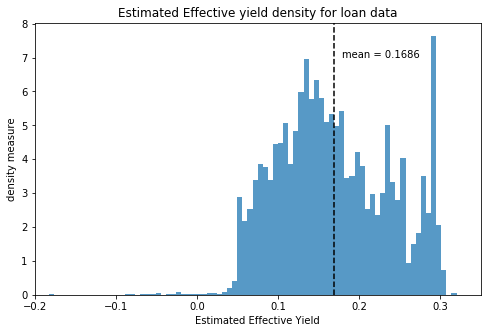

In [6]:
#query results
dfy = df2.query('estimatedeffectiveyield != 0')
#plot
plt.figure(figsize = [8, 5])
plt.hist(data = dfy, x = 'estimatedeffectiveyield', density = True, bins = 80, histtype = 'bar', alpha = 0.75);
plt.xlim(-0.2,0.35);
plt.axvline(dfy['estimatedeffectiveyield'].mean(), color='k', linestyle='dashed', linewidth=1.5)
plt.text(dfy['estimatedeffectiveyield'].mean()+0.01, 7,'mean = 0.1686')
plt.xlabel('Estimated Effective Yield');
plt.ylabel('density measure');
plt.title('Estimated Effective yield density for loan data');

plt.show()

### The Estimated Effective Yield distribution over Credit grades
The mean of the yield decreases with the higher credit grade, that is also accompanied by frequency of outliers which decrease also, meaning more chances of returns on investments but with lower gain margins against subject of losses on the lower credit grades.

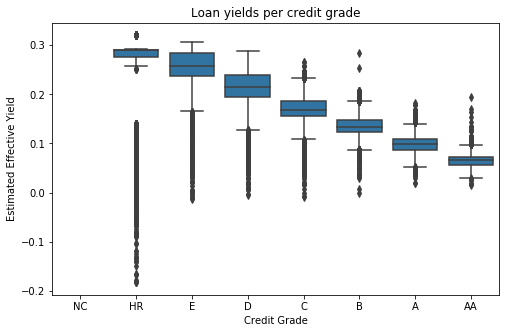

In [7]:
base_color = sb.color_palette()[0]
order = ['NC', 'HR', 'E', 'D','C','B','A','AA']

plt.figure(figsize = [8, 5])
sb.boxplot(data = df2, x = 'creditgrade', y = 'estimatedeffectiveyield', order = order, color = base_color);
plt.xlabel('Credit Grade');
plt.ylabel('Estimated Effective Yield');
plt.title('Loan yields per credit grade');

### The Correlation of Borrwer rate/APR and Estimated effective yield with the rest of the numeric variables
A strong positive correlation present between the Estimated Effective yield and the rates. On the other hand, Prosper score shows the strongest negative correlation with the Borrower rates and the effective yield. Loan amount listed and the number of investors have a wek negative correlation with the rates and the effective yield.

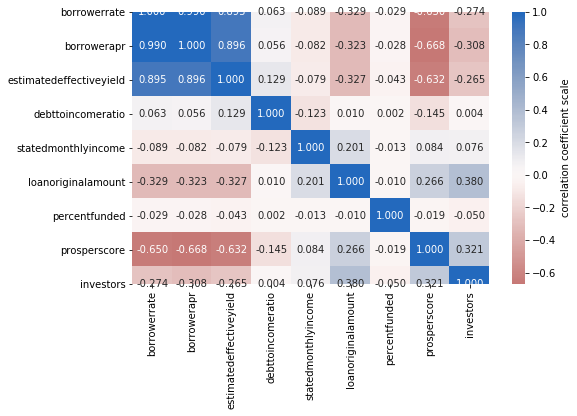

In [8]:
numeric_vars = ['borrowerrate', 'borrowerapr', 'estimatedeffectiveyield', 'debttoincomeratio', 'statedmonthlyincome'
                , 'loanoriginalamount', 'percentfunded', 'prosperscore', 'investors']

plt.figure(figsize = [8, 5])
sb.heatmap(df2[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0, cbar_kws={'label': 'correlation coefficient scale'})

plt.show()

### Studying the rates with the Employment status and the listing categories
The unemployed borrowers get to obtain the highest average rate of ~24.5% and ~27.5% (for the Borrower rate and APR respectively). Individuals who are employed get the lower rates near the average rates or slightly higher (in the case of employed borrowers having slightly higher mean Borrower APR).

As for the listing categories, most of the categories fall over the mean interest rates, commonly 5 categories are under the mean.

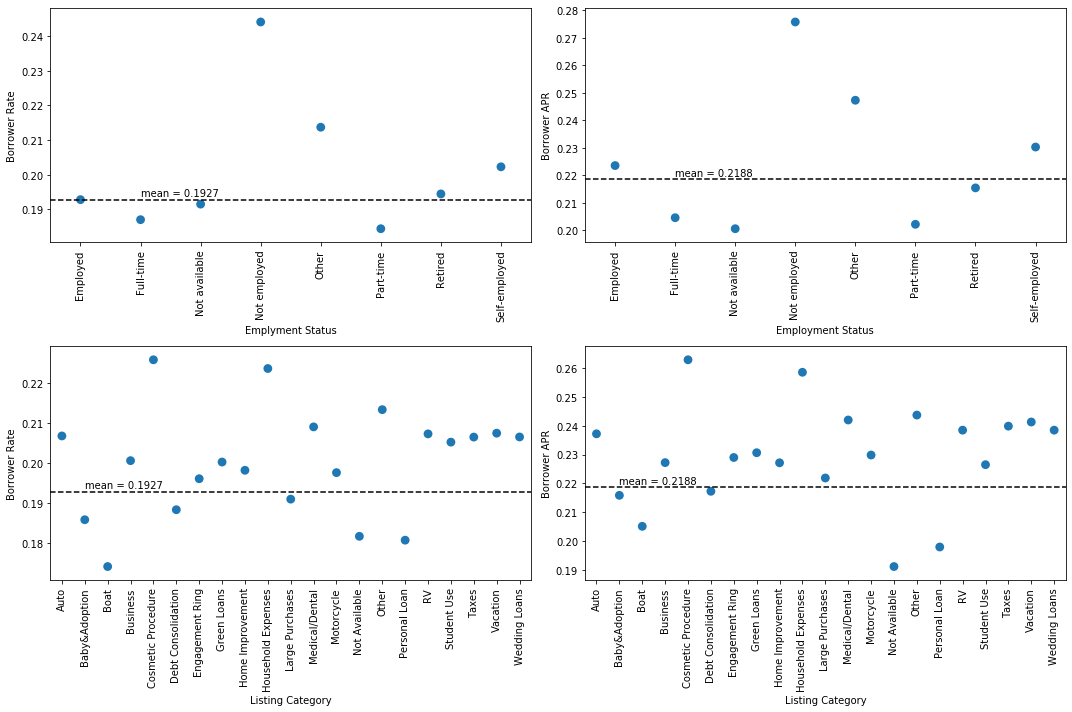

In [9]:
ct_counts = df2.groupby(['listingcat'])['borrowerrate', 'borrowerapr'].mean().reset_index()
ct_counts2 = df2.groupby(['employmentstatus'])['borrowerrate', 'borrowerapr'].mean().reset_index()

plt.figure(figsize = [15, 10])
plt.subplot(2, 2, 1) # 1 row, 2 cols, subplot 1
base_color = sb.color_palette()[0]
sb.pointplot(data = ct_counts2, y = 'borrowerrate', x = 'employmentstatus', color = base_color, linestyles = "");
plt.axhline(df2['borrowerrate'].mean(), color='k', linestyle='dashed', linewidth=1.5)
plt.text(1, df2['borrowerrate'].mean()+0.001, 'mean = 0.1927')
plt.ylabel('Borrower Rate');
plt.xlabel('Emplyment Status');
plt.xticks(rotation = 90);

plt.subplot(2, 2, 2) # 1 row, 2 cols, subplot 1
base_color = sb.color_palette()[0]
sb.pointplot(data = ct_counts2, y = 'borrowerapr', x = 'employmentstatus', color = base_color, linestyles = "");
plt.axhline(df2['borrowerapr'].mean(), color='k', linestyle='dashed', linewidth=1.5)
plt.text(1, df2['borrowerapr'].mean()+0.001, 'mean = 0.2188')
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');
plt.xticks(rotation = 90);

plt.subplot(2, 2, 3) # 1 row, 2 cols, subplot 1
base_color = sb.color_palette()[0]
sb.pointplot(data = ct_counts, y = 'borrowerrate', x = 'listingcat', color = base_color, linestyles = "");
plt.axhline(df2['borrowerrate'].mean(), color='k', linestyle='dashed', linewidth=1.5)
plt.text(1, df2['borrowerrate'].mean()+0.001, 'mean = 0.1927')
plt.ylabel('Borrower Rate');
plt.xlabel('Listing Category');
plt.xticks(rotation = 90);

plt.subplot(2, 2, 4) # 1 row, 2 cols, subplot 1

base_color = sb.color_palette()[0]
sb.pointplot(data = ct_counts, y = 'borrowerapr', x = 'listingcat', color = base_color, linestyles = "");
plt.axhline(df2['borrowerapr'].mean(), color='k', linestyle='dashed', linewidth=1.5)
plt.text(1, df2['borrowerapr'].mean()+0.001, 'mean = 0.2188')
plt.ylabel('Borrower APR');
plt.xlabel('Listing Category');
plt.xticks(rotation = 90);

plt.tight_layout()

### Zoom in on the listing categories with the Borrower interest rate (APR)
It can be seen here that the dominant category is the Debt Consolidation. Most of the borrowers in this dataset actually get a loan to payoff other loans/debts. With the most rates being given sitting roughly between 15% and 20%.

An honorable mention is that the listings that come in after Debt Consolidation with are label Other and Not Available. Nothing to look beyond here as this is an unattainable data.

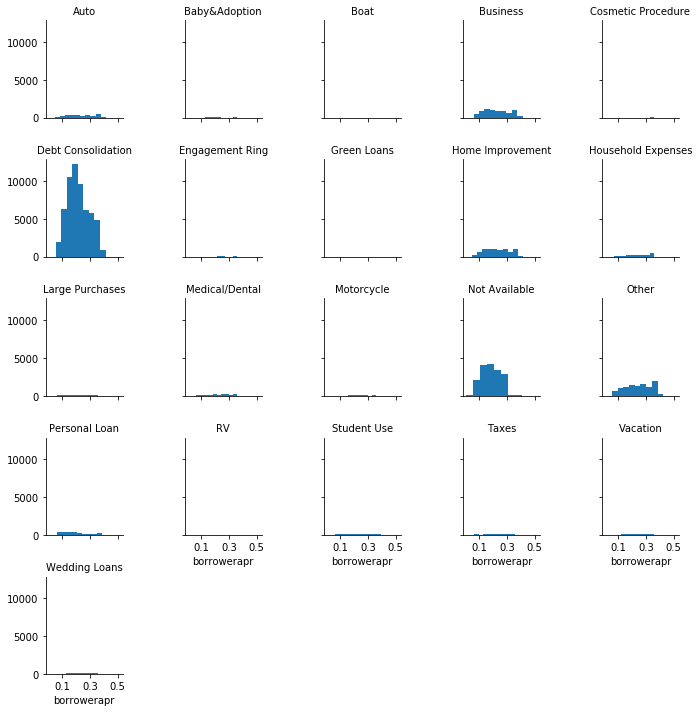

In [10]:
g = sb.FacetGrid(data = df2, col = 'listingcat', col_wrap = 5, height = 2);
g.map(plt.hist, "borrowerapr").set(xticks=[0.1, 0.3, 0.5]);
g.set_titles('{col_name}');

### Multivariate analysis on the Debt Consolidation
 As it can be seen the most density of points show that loan requests that are frequent are up to 10k USD. Other loan amounts being requested reaching to 35k USD. The Borrower APR in the plot is at the highest for low value loans, already proven by their negative correlation.

Though most of the points fall at a lower range across the loan amounts requested, there are some points that show a very extreme debt to income ratio, even reaching to 10 times the income being recieved.

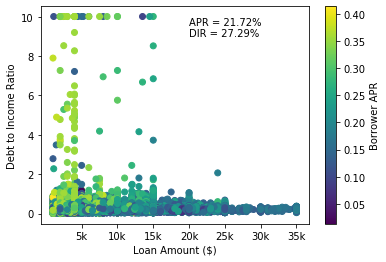

In [11]:
con = df2.query('listingcat == "Debt Consolidation"', inplace = False)
plt.scatter(data = con, y = 'debttoincomeratio', x = 'loanoriginalamount', c = 'borrowerapr');
plt.colorbar(label = 'Borrower APR');
plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000], ['5k', '10k', '15k', '20k', '25k', '30k', '35k']);
plt.xlabel('Loan Amount ($)');
plt.ylabel('Debt to Income Ratio');
plt.text(con['loanoriginalamount'].max() - 15000, 9,'APR = 21.72% \nDIR = 27.29%');

### The trend of the interest rates over time
**N.B.:** Data missing from the economic crisis time (Q3 2008 till Q3 2009) will show a cut off to the time series, this is tackled by the moving average as I will be having 3 windows of rolling mean.

Interest rates took a leap up from Q1 2006 to reach mean rates at ~25% till stablizing afterwards althrough till 2008. Just befoe the start of the economic crisis the rates started to have a slight increase.

Post the economic crisis the rates continued an increase to a sky high ~30%. Then steadly falling down to reach a post economic crisis low of ~20% average and going less. The Federal reserve then decided on steady growths in rates in a bid to improve more on economic activities according to this [article](https://www.nytimes.com/2014/12/18/business/federal-reserve-interest-rates-yellen.html) in the NY times.

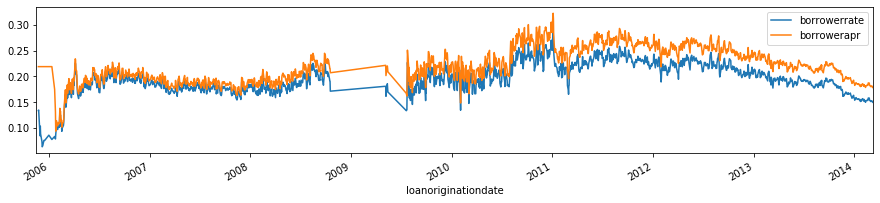

In [12]:
df3 = df2.groupby('loanoriginationdate')['borrowerrate','borrowerapr'].mean()

rolling = df3.rolling(window = 3)
rolling_mean = rolling.mean()
rolling_mean.plot(figsize=(15, 3))

plt.show()

### The trend on loan original amount and prosper score
Pre economic crisis shows a slight increase in loan values requested over time, only to be lowered again just before the economic crisis. Post the crisis loan amounts began to take a slight increase over time, thanks to lowering of the Borrowers' interest rates.

As for the Prosper score (post July 2009), average scores started decreasing onto 2013. With average scores starting as high as 9 and ending up at low around 5 at the start of 2013, a slight increase in the average score meant averages are slightly over 6

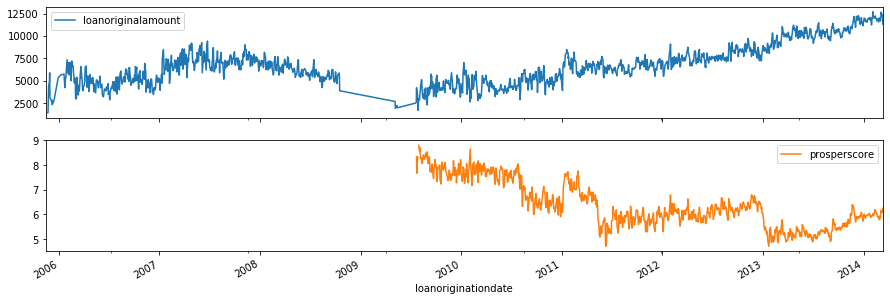

In [13]:
df3 = df2.groupby('loanoriginationdate')['loanoriginalamount', 'prosperscore'].mean()

rolling = df3.rolling(window = 3)
rolling_mean = rolling.mean()
rolling_mean.plot(figsize=(15, 5), subplots = True)

plt.show()

## Key takeouts from the analysis

### Conclusions
I noticed how the Interest rates vary and what main variables actually have a an influence on them. Many of the data highlights strong influencers as Prosper score or loan amounts as numeric variables, or categorial as the employment status and listing categories.

There are some interesting conclusions and insights that were seen here. I wanted to see the borrowing interest rates with all variables, now I can conclude the following.

Many of the borrowers are burdened by borrowing interest rates over the course of time. Apart from loan facilities, most of these individuals are relatively young given the years of experience, and with income ranges at the middle.

These individuals seem to usually carry on lives through debts, since loan listings show an increase in loan amounts being taken by the year with the dominant factor is settling other debts (Debt Consolidation) other than most listings. This loop of lending is a worrying signal as neither do (nearly) half of these people have a collateral other than their salary and not home owners even.

### Side takes on the analysis
Some advanced studies can be done on this analysis if we bring in more variables from the source data. However, I have no Financial background and my study is based on my observations on the various behaviours I get. 

One point I do not affirm my understanding about is the Debt to income ratio in the multivariate analysis I did on the Debt Consolidation listing, I cannot confirm or dismiss that a debt to income ratio as high as 10 is actual (you have 10 times a debt than your income!).